In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib  # 한글 폰트 적용

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 67.5 MB/s eta 0:00:00


In [ ]:
!pip install konlpy matplotlib seaborn
#konlpy가지고 형태소 분석, token 분석 가

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 35.5 MB/s eta 0:00:00


토큰: ['비틀거릴', '내', '가', '안길', '곳', '은', '어디', '에']


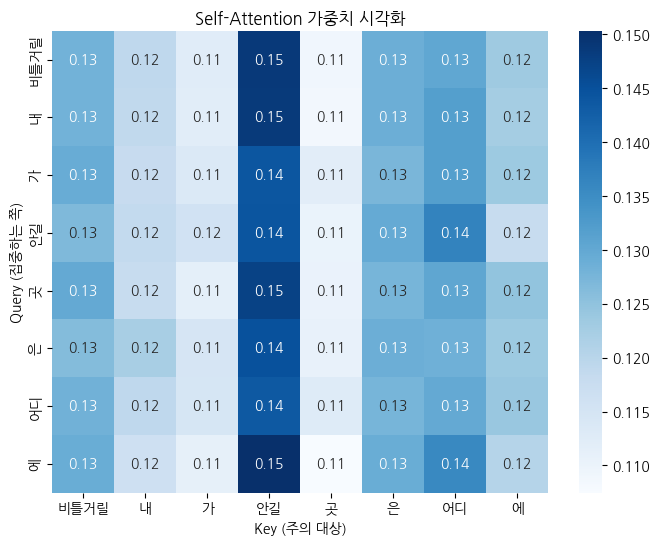

In [ ]:
# PyTorch 및 필수 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt

# Self-Attention 레이어 정의
class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.embed_dim = embed_dim  # 입력 벡터 차원 (예: 5차원)
        self.scale = embed_dim ** 0.5  # 스케일링 계수: √d (attention 안정화를 위한 정규화)

        # Query, Key, Value 생성을 위한 선형 변환 (Wx + b)
        self.W_q = nn.Linear(embed_dim, embed_dim)  # Query weight
        self.W_k = nn.Linear(embed_dim, embed_dim)  # Key weight
        self.W_v = nn.Linear(embed_dim, embed_dim)  # Value weight

    def forward(self, x):
        # x: [batch_size, seq_len, embed_dim] 형태의 입력
        # 입력을 Q, K, V로 각각 선형변환 → shape 동일: [batch, seq_len, embed_dim]
        Q = self.W_q(x)  # Query
        K = self.W_k(x)  # Key
        V = self.W_v(x)  # Value

        # Q와 K를 내적하여 어텐션 스코어 계산: [batch, seq_len, seq_len]
        # Q @ K^T = 각 단어가 다른 단어에 주는 중요도 (유사도 측정)
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / self.scale
        # transpose(-2, -1): Key 텐서를 뒤집어 (행렬 곱 가능하도록) [seq_len, embed_dim] → [embed_dim, seq_len]

        # 스코어에 softmax 적용하여 확률 분포로 변환 → attention weights
        # 각 Query 위치가 다른 Key 위치에 얼마나 집중하는지 나타냄
        attn_weights = F.softmax(attn_scores, dim=-1)

        # attention weights를 Value에 곱하여 최종 출력 생성
        # Query 위치마다 모든 Value들을 중요도(attn_weights) 기반으로 종합한 값
        output = torch.matmul(attn_weights, V)  # shape: [batch, seq_len, embed_dim]

        return output, attn_weights  # 출력과 어텐션 가중치 반환

# 1. 입력 문장
sentence = "비틀거릴 내가 안길 곳은 어디에"

# 2. 형태소 분석기로 토큰화 (띄어쓰기 단위 X → 형태소 단위)
okt = Okt()
tokens = okt.morphs(sentence)  # 예: ['한국', '의', '여름', '날씨', '는', '무덥고', '습합니', '다']
print("토큰:", tokens)

# 3. 각 토큰에 대해 5차원 임베딩 벡터 생성 (여기서는 임의의 랜덤값 사용)
embed_dim = 5
np.random.seed(0)  # 재현 가능성을 위한 고정 시드
embedding_dict = {token: np.random.rand(embed_dim) for token in tokens}

# 임베딩 벡터를 시퀀스로 구성하고 PyTorch 텐서로 변환
# embedded shape: [1, seq_len, embed_dim] (batch 포함)
embedded = torch.tensor([embedding_dict[t] for t in tokens], dtype=torch.float32).unsqueeze(0)

# 4. Self-Attention 수행
model = SelfAttention(embed_dim)
output, attn_weights = model(embedded)

# output: 각 토큰 위치마다 attention을 적용한 임베딩 결과
# attn_weights: 어텐션 가중치 행렬 [1, seq_len, seq_len]

# 5. 어텐션 가중치 시각화
attn_matrix = attn_weights.squeeze(0).detach().numpy()  # [seq_len, seq_len] 형태로 변환
plt.figure(figsize=(8, 6))
sns.heatmap(attn_matrix, xticklabels=tokens, yticklabels=tokens, cmap='Blues', annot=True, fmt=".2f")
plt.title("Self-Attention 가중치 시각화")
plt.xlabel("Key (주의 대상)")
plt.ylabel("Query (집중하는 쪽)")
plt.show()

self Attention 기반 STT

100%|██████████| 331M/331M [00:17<00:00, 20.3MB/s]


학습 시작...
Epoch 1 - Loss: 9.8046
Epoch 2 - Loss: 7.7241
Epoch 3 - Loss: 6.8404
Epoch 4 - Loss: 6.6569
Epoch 5 - Loss: 6.3900
Epoch 6 - Loss: 6.4811
Epoch 7 - Loss: 6.1893
Epoch 8 - Loss: 6.0330
Epoch 9 - Loss: 6.0856
Epoch 10 - Loss: 5.9100
Epoch 11 - Loss: 5.7058
Epoch 12 - Loss: 5.6992
Epoch 13 - Loss: 5.6239
Epoch 14 - Loss: 5.6436
Epoch 15 - Loss: 5.6447
Epoch 16 - Loss: 5.5463
Epoch 17 - Loss: 5.3762
Epoch 18 - Loss: 5.3697
Epoch 19 - Loss: 5.2069
Epoch 20 - Loss: 5.1538
Epoch 21 - Loss: 5.1382
Epoch 22 - Loss: 5.0174
Epoch 23 - Loss: 5.0685
Epoch 24 - Loss: 4.8439
Epoch 25 - Loss: 4.8784
Epoch 26 - Loss: 4.7889
Epoch 27 - Loss: 4.7513
Epoch 28 - Loss: 4.7378
Epoch 29 - Loss: 4.7174
Epoch 30 - Loss: 4.6352
Epoch 31 - Loss: 4.5854
Epoch 32 - Loss: 4.5417
Epoch 33 - Loss: 4.5274
Epoch 34 - Loss: 4.4277
Epoch 35 - Loss: 4.3919
Epoch 36 - Loss: 4.3443
Epoch 37 - Loss: 4.3787
Epoch 38 - Loss: 4.3019
Epoch 39 - Loss: 4.3166
Epoch 40 - Loss: 4.2961
Epoch 41 - Loss: 4.2939
Epoch 42 - Loss:

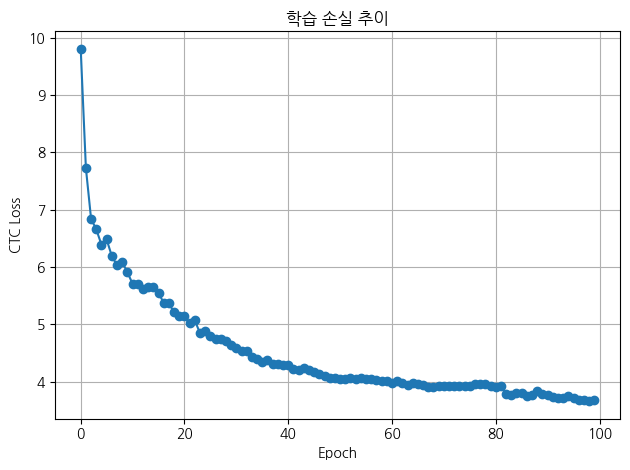


--- 테스트 샘플 예측 ---
예측: aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
정답: beware of making that mistake


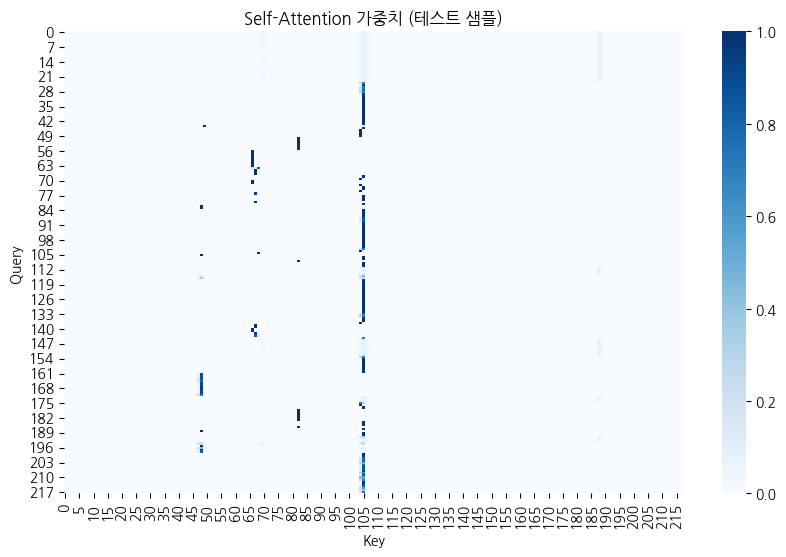

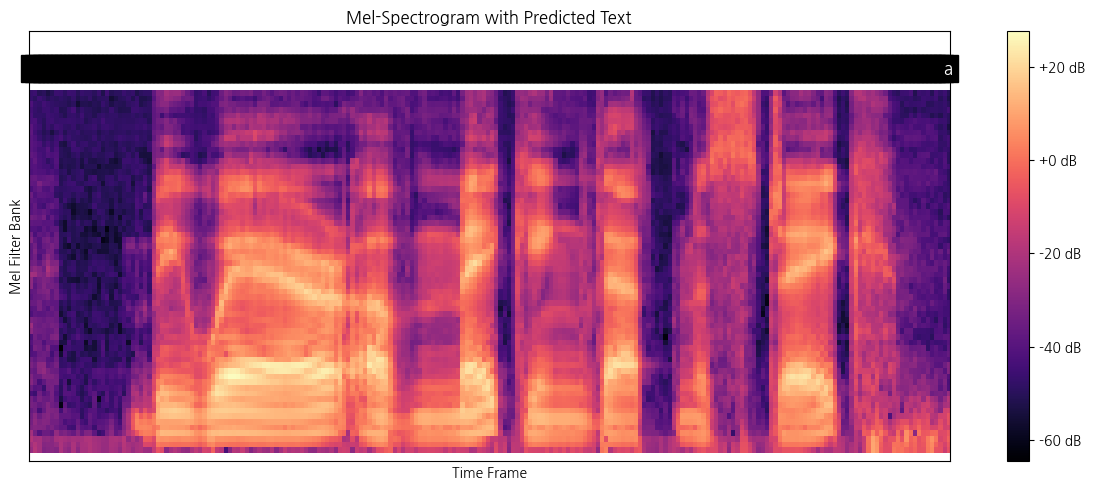

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from IPython.display import Audio, display

# 1. 학습 데이터셋 (상위 100개)
raw_dataset = torchaudio.datasets.LIBRISPEECH(root="./", url="test-clean", download=True)
train_dataset = [raw_dataset[i] for i in range(100)]

# 2. 문자 집합 생성
def build_vocab(dataset):
    chars = set()
    for _, _, transcript, _, _, _ in dataset:
        chars.update(transcript.lower())
    char2idx = {c: i + 1 for i, c in enumerate(sorted(chars))}
    char2idx["<blank>"] = 0
    idx2char = {i: c for c, i in char2idx.items()}
    return char2idx, idx2char

char2idx, idx2char = build_vocab(train_dataset)
num_classes = len(char2idx)

# 3. Mel 변환기
mel_transform = T.MelSpectrogram(sample_rate=16000, n_mels=64)

# 4. 학습용 데이터셋 클래스 정의
class STTDataset(Dataset):
    def __init__(self, dataset):
        self.data = []
        for waveform, sr, transcript, *_ in dataset:
            mel = mel_transform(waveform).squeeze(0).transpose(0, 1)
            mel = mel[:600] if mel.size(0) > 600 else mel
            label = torch.tensor([char2idx[c] for c in transcript.lower() if c in char2idx])
            self.data.append((mel, label))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

def collate_fn(batch):
    X, y = zip(*batch)
    X_lens = torch.tensor([x.size(0) for x in X])
    y_lens = torch.tensor([t.size(0) for t in y])
    X_pad = nn.utils.rnn.pad_sequence(X, batch_first=True)
    y_cat = torch.cat(y)
    return X_pad, y_cat, X_lens, y_lens

# 5. Self-Attention
class SelfAttention(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.q = nn.Linear(dim, dim)
        self.k = nn.Linear(dim, dim)
        self.v = nn.Linear(dim, dim)
        self.scale = dim ** 0.5

    def forward(self, x):
        Q = self.q(x)
        K = self.k(x)
        V = self.v(x)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / self.scale
        attn_weights = F.softmax(scores, dim=-1)
        output = torch.matmul(attn_weights, V)
        return output, attn_weights

# 6. 모델 정의
class SimpleSTT(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super().__init__()
        self.attn = SelfAttention(input_dim)
        self.ffn = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        out, attn = self.attn(x)
        logits = self.ffn(out)
        return logits, attn

# 7. 학습 설정
batch_size = 8
train_loader = DataLoader(STTDataset(train_dataset), batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
model = SimpleSTT(input_dim=64, hidden_dim=128, num_classes=num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CTCLoss(blank=char2idx["<blank>"], zero_infinity=True)
losses = []

# 8. 학습 수행
print("학습 시작...")
for epoch in range(100):
    model.train()
    total_loss = 0
    for X_batch, y_batch, X_lens, y_lens in train_loader:
        optimizer.zero_grad()
        logits, _ = model(X_batch)
        log_probs = F.log_softmax(logits, dim=-1).transpose(0, 1)
        loss = criterion(log_probs, y_batch, X_lens, y_lens)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch + 1} - Loss: {avg_loss:.4f}")

# 9. 손실 시각화
plt.plot(losses, marker='o')
plt.title("학습 손실 추이")
plt.xlabel("Epoch")
plt.ylabel("CTC Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. 테스트 샘플 예측 및 시각화
print("\n--- 테스트 샘플 예측 ---")
test_index = 30
test_sample = torchaudio.datasets.LIBRISPEECH(root="./", url="test-clean", download=True)[test_index]
waveform, sr, transcript, *_ = test_sample

mel = mel_transform(waveform).squeeze(0).transpose(0, 1)
mel = mel[:600] if mel.size(0) > 600 else mel
input_tensor = mel.unsqueeze(0)
input_len = torch.tensor([mel.size(0)])

model.eval()
with torch.no_grad():
    logits, attn_weights = model(input_tensor)
    probs = F.softmax(logits, dim=-1)
    pred_ids = torch.argmax(probs, dim=-1)[0][:input_len.item()].cpu().numpy()
    prev = -1
    decoded = [i for i in pred_ids if i != prev and i != char2idx["<blank>"] or (prev := i) == -1]
    pred_text = ''.join([idx2char.get(i, "") for i in decoded])

    print(f"예측: {pred_text}")
    print(f"정답: {transcript.lower()}")

    display(Audio(waveform.squeeze().numpy(), rate=sr))

    attn = attn_weights[0][:input_len.item(), :input_len.item()].cpu().numpy()
    plt.figure(figsize=(10, 6))
    sns.heatmap(attn, cmap='Blues')
    plt.title("Self-Attention 가중치 (테스트 샘플)")
    plt.xlabel("Key")
    plt.ylabel("Query")
    plt.show()

# 11. Mel-Spectrogram + 텍스트 시각화
mel_spec_tensor = mel_transform(waveform)
mel_spec_db = torchaudio.functional.amplitude_to_DB(mel_spec_tensor, multiplier=10.0, amin=1e-10, db_multiplier=0.0)
mel_spec = mel_spec_db[0].numpy()
n_mels, n_frames = mel_spec.shape
text_to_show = pred_text.replace(" ", "")
text_len = len(text_to_show)

plt.figure(figsize=(12, 5))
plt.imshow(mel_spec, origin='lower', aspect='auto', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram with Predicted Text")
plt.xlabel("Time Frame")
plt.ylabel("Mel Filter Bank")
plt.xticks([])
plt.yticks([])

if text_len > 0:
    frame_per_char = n_frames / text_len
    for i, char in enumerate(text_to_show):
        frame_x = int((i + 0.5) * frame_per_char)
        if frame_x < n_frames:
            plt.text(frame_x, n_mels + 2, char, fontsize=12, ha='center', va='bottom',
                     color='white', backgroundcolor='black')

plt.ylim(-2, n_mels + 10)
plt.tight_layout()
plt.show()

seq2seq

In [1]:
# fsdd_seq2seq_attention_fixed_with_inference.py
"""
Seq2Seq with Bahdanau Attention for FSDD, with model saving and inference visualization
"""
import os
import subprocess
from typing import List, Tuple

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ─────────────────────────────────────────────────────────────────────────────
# 1. Prepare FSDD recordings
# ─────────────────────────────────────────────────────────────────────────────
if not os.path.isdir("recordings"):
    subprocess.run([
        "git", "clone", "--depth", "1",
        "https://github.com/Jakobovski/free-spoken-digit-dataset.git"
    ], check=True)
    os.replace("free-spoken-digit-dataset/recordings", "recordings")

DIGIT_STR = ["zero","one","two","three","four","five","six","seven","eight","nine"]

# ─────────────────────────────────────────────────────────────────────────────
# 2. Character vocabulary
# ─────────────────────────────────────────────────────────────────────────────
class CharVocab:
    def __init__(self, tokens: List[str]):
        self.SOS, self.EOS = "<sos>", "<eos>"
        self.PAD, self.UNK = "<pad>", "<unk>"
        chars = {c for tok in tokens for c in tok}
        self.i2c = [self.PAD, self.SOS, self.EOS, self.UNK] + sorted(chars)
        self.c2i = {c:i for i,c in enumerate(self.i2c)}
    def encode(self, s: str) -> List[int]:
        return [self.c2i[self.SOS]] + \
               [self.c2i.get(c, self.c2i[self.UNK]) for c in s] + \
               [self.c2i[self.EOS]]
    def decode(self, ids: List[int]) -> str:
        res = []
        for i in ids:
            c = self.i2c[i]
            if c in (self.SOS, self.EOS, self.PAD): continue
            res.append(c)
        return "".join(res)

vocab = CharVocab(DIGIT_STR)

# ─────────────────────────────────────────────────────────────────────────────
# 3. Dataset & DataLoader
# ─────────────────────────────────────────────────────────────────────────────
class FSDDSeq2SeqDataset(Dataset):
    def __init__(self,
                 files: List[str],
                 vocab: CharVocab,
                 sr: int = 8000,
                 n_mfcc: int = 13,
                 max_frames: int = 64):
        self.files = files; self.vocab = vocab
        self.sr, self.n_mfcc, self.max_frames = sr, n_mfcc, max_frames
        self.mfcc_transform = torchaudio.transforms.MFCC(
            sample_rate=sr, n_mfcc=n_mfcc, log_mels=True)
    def __len__(self) -> int: return len(self.files)
    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor]:
        path = self.files[idx]
        label_digit = int(os.path.basename(path)[0])
        label_str = DIGIT_STR[label_digit]
        token_ids = self.vocab.encode(label_str)
        waveform, orig_sr = torchaudio.load(path)
        waveform = torchaudio.functional.resample(
            waveform, orig_freq=orig_sr, new_freq=self.sr)
        mfcc = self.mfcc_transform(waveform).squeeze(0).transpose(0,1)
        if mfcc.size(0) < self.max_frames:
            pad_amt = self.max_frames - mfcc.size(0)
            mfcc = F.pad(mfcc, (0,0,0,pad_amt))
        else:
            mfcc = mfcc[:self.max_frames]
        return mfcc, torch.tensor(token_ids, dtype=torch.long)

def collate_fn(batch):
    xs, ys = zip(*batch)
    xs = torch.stack(xs, dim=0)  # [B, T, n_mfcc]
    lengths = [y.size(0) for y in ys]
    max_len = max(lengths)
    ys_padded = torch.full((len(ys), max_len),
                           fill_value=vocab.c2i[vocab.PAD],
                           dtype=torch.long)
    for i, y in enumerate(ys):
        ys_padded[i, :lengths[i]] = y
    return xs, ys_padded, torch.tensor(lengths, dtype=torch.long)

all_files = sorted([
    os.path.join("recordings", f)
    for f in os.listdir("recordings") if f.endswith(".wav")
])
train_files, test_files = train_test_split(
    all_files, test_size=0.2, random_state=42,
    stratify=[f[11] for f in all_files]
)

train_ds = FSDDSeq2SeqDataset(train_files, vocab)
test_ds  = FSDDSeq2SeqDataset(test_files,  vocab)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True,
                          collate_fn=collate_fn)
test_loader  = DataLoader(test_ds,  batch_size=32, shuffle=False,
                          collate_fn=collate_fn)

# ─────────────────────────────────────────────────────────────────────────────
# 4. Model: Encoder–Decoder with Bahdanau Attention + init-hidden mapping
# ─────────────────────────────────────────────────────────────────────────────
class EncoderRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers=1, bidir=True):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim,
                          num_layers=n_layers,
                          batch_first=True,
                          bidirectional=bidir)
        self.hidden_mult = 2 if bidir else 1
    def forward(self, x):
        outputs, hidden = self.gru(x)
        return outputs, hidden  # hidden: [2, B, H] if bidir

class BahdanauAttention(nn.Module):
    def __init__(self, enc_dim, dec_dim, attn_dim):
        super().__init__()
        self.W_enc = nn.Linear(enc_dim, attn_dim, bias=False)
        self.W_dec = nn.Linear(dec_dim, attn_dim, bias=False)
        self.v_attn = nn.Linear(attn_dim, 1, bias=False)
    def forward(self, encoder_outputs, dec_hidden):
        enc_proj = self.W_enc(encoder_outputs)          # [B,T,attn_dim]
        dec_proj = self.W_dec(dec_hidden).unsqueeze(1)  # [B,1,attn_dim]
        e = torch.tanh(enc_proj + dec_proj)             # [B,T,attn_dim]
        scores = self.v_attn(e).squeeze(-1)             # [B,T]
        α = F.softmax(scores, dim=1)                    # [B,T]
        context = torch.bmm(α.unsqueeze(1), encoder_outputs).squeeze(1)
        return context, α

class DecoderRNN(nn.Module):
    def __init__(self,
                 output_dim: int,
                 emb_dim: int,
                 enc_dim: int,
                 dec_dim: int,
                 attn_dim: int,
                 n_layers: int = 1):
        super().__init__()
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.attention = BahdanauAttention(enc_dim, dec_dim, attn_dim)
        self.gru = nn.GRU(emb_dim + enc_dim, dec_dim,
                          num_layers=n_layers, batch_first=True)
        self.out = nn.Linear(dec_dim, output_dim)
    def forward(self, input_tok, prev_hidden, encoder_outputs):
        embedded = self.embedding(input_tok).unsqueeze(1)  # [B,1,emb_dim]
        dec_h = prev_hidden[-1]                            # [B,dec_dim]
        context, _ = self.attention(encoder_outputs, dec_h)
        rnn_in = torch.cat([embedded, context.unsqueeze(1)], dim=-1)
        output, hidden = self.gru(rnn_in, prev_hidden)
        logits = self.out(output.squeeze(1))
        return logits, hidden

class Seq2SeqAttention(nn.Module):
    def __init__(self,
                 input_dim: int,
                 emb_dim: int,
                 enc_dim: int,
                 dec_dim: int,
                 attn_dim: int,
                 output_dim: int,
                 enc_layers: int = 1,
                 dec_layers: int = 1):
        super().__init__()
        self.encoder = EncoderRNN(input_dim, enc_dim,
                                  n_layers=enc_layers, bidir=True)
        self.init_hidden = nn.Linear(enc_dim*2, dec_dim)
        self.decoder = DecoderRNN(output_dim, emb_dim,
                                  enc_dim*2, dec_dim, attn_dim, n_layers=dec_layers)
    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        B, T, _ = src.size(); L = trg.size(1)
        enc_outs, hidden = self.encoder(src)
        h_cat = torch.cat([hidden[-2], hidden[-1]], dim=1)  # [B,enc_dim*2]
        dec_init = torch.tanh(self.init_hidden(h_cat)).unsqueeze(0)  # [1,B,dec_dim]
        outputs = torch.zeros(B, L, self.decoder.out.out_features,
                              device=src.device)
        input_tok = trg[:,0]
        hidden_dec = dec_init
        for t in range(1, L):
            logits, hidden_dec = self.decoder(input_tok, hidden_dec, enc_outs)
            outputs[:,t] = logits
            teacher_force = torch.rand(1).item() < teacher_forcing_ratio
            top1 = logits.argmax(1)
            input_tok = trg[:,t] if teacher_force else top1
        return outputs

# ─────────────────────────────────────────────────────────────────────────────
# 5. Training & Evaluation
# ─────────────────────────────────────────────────────────────────────────────
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Seq2SeqAttention(
    input_dim=train_ds.n_mfcc,
    emb_dim=64,
    enc_dim=128,
    dec_dim=128,
    attn_dim=64,
    output_dim=len(vocab.i2c),
    enc_layers=1,
    dec_layers=1
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss(ignore_index=vocab.c2i[vocab.PAD])

def train_epoch():
    model.train(); total_loss = 0
    for src, trg, _ in train_loader:
        src, trg = src.to(device), trg.to(device)
        optimizer.zero_grad()
        outputs = model(src, trg, teacher_forcing_ratio=0.5)
        logits = outputs[:,1:].reshape(-1, outputs.size(-1))
        targets = trg[:,1:].reshape(-1)
        loss = criterion(logits, targets)
        loss.backward(); optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate():
    model.eval(); correct, total = 0, 0
    with torch.no_grad():
        for src, trg, _ in test_loader:
            src, trg = src.to(device), trg.to(device)
            outputs = model(src, trg, teacher_forcing_ratio=0.0)
            preds = outputs.argmax(-1)
            for i in range(src.size(0)):
                pred_str = vocab.decode(preds[i].cpu().tolist())
                true_str = vocab.decode(trg[i].cpu().tolist())
                if pred_str == true_str: correct += 1
                total += 1
    return correct / total

# ─────────────────────────────────────────────────────────────────────────────
# 6. Main Training Loop + Save Model
# ─────────────────────────────────────────────────────────────────────────────
n_epochs = 20
for epoch in range(1, n_epochs+1):
    loss = train_epoch()
    acc  = evaluate()
    print(f"Epoch {epoch:02d} | Train Loss: {loss:.4f} | Test Acc: {acc*100:5.2f}%")

# 모델 저장
torch.save(model.state_dict(), "fsdd_seq2seq_attn_model.pt")
print("Model saved -> fsdd_seq2seq_attn_model.pt")

Epoch 01 | Train Loss: 1.6090 | Test Acc: 62.50%
Epoch 02 | Train Loss: 0.2916 | Test Acc: 96.50%
Epoch 03 | Train Loss: 0.0782 | Test Acc: 98.33%
Epoch 04 | Train Loss: 0.0306 | Test Acc: 99.33%
Epoch 05 | Train Loss: 0.0169 | Test Acc: 99.50%
Epoch 06 | Train Loss: 0.0111 | Test Acc: 98.83%
Epoch 07 | Train Loss: 0.0112 | Test Acc: 99.33%
Epoch 08 | Train Loss: 0.0053 | Test Acc: 98.67%
Epoch 09 | Train Loss: 0.0042 | Test Acc: 99.17%
Epoch 10 | Train Loss: 0.0029 | Test Acc: 99.50%
Epoch 11 | Train Loss: 0.0038 | Test Acc: 99.33%
Epoch 12 | Train Loss: 0.0046 | Test Acc: 98.67%
Epoch 13 | Train Loss: 0.0041 | Test Acc: 99.67%
Epoch 14 | Train Loss: 0.0016 | Test Acc: 99.83%
Epoch 15 | Train Loss: 0.0025 | Test Acc: 99.33%
Epoch 16 | Train Loss: 0.0023 | Test Acc: 99.67%
Epoch 17 | Train Loss: 0.0172 | Test Acc: 97.00%
Epoch 18 | Train Loss: 0.0098 | Test Acc: 98.83%
Epoch 19 | Train Loss: 0.0089 | Test Acc: 99.83%
Epoch 20 | Train Loss: 0.0017 | Test Acc: 99.50%
Model saved -> fsdd_

Playing original audio: 5_lucas_20.wav


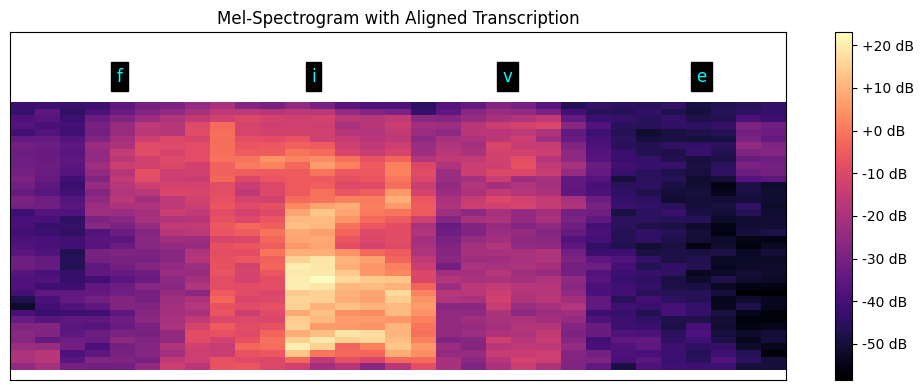

In [6]:
# ─────────────────────────────────────────────────────────────────────────────
# 7. Inference on one example + Audio playback + Aligned overlay visualization
# ─────────────────────────────────────────────────────────────────────────────
from IPython.display import Audio, display

# pick one test sample
sample_path = test_files[10]
waveform, orig_sr = torchaudio.load(sample_path)
# audio playback
print(f"Playing original audio: {os.path.basename(sample_path)}")
display(Audio(waveform.squeeze().numpy(), rate=orig_sr))

# resample & MFCC frontend
waveform = torchaudio.functional.resample(
    waveform, orig_freq=orig_sr, new_freq=train_ds.sr
)
mfcc = train_ds.mfcc_transform(waveform).squeeze(0).transpose(0,1)
if mfcc.size(0) < train_ds.max_frames:
    mfcc = F.pad(mfcc, (0,0,0,train_ds.max_frames-mfcc.size(0)))
else:
    mfcc = mfcc[:train_ds.max_frames]
src = mfcc.unsqueeze(0).to(device)  # [1,T,n_mfcc]

# greedy inference
model.eval()
with torch.no_grad():
    enc_outs, hidden = model.encoder(src)
    h_cat = torch.cat([hidden[-2], hidden[-1]], dim=1)
    hidden_dec = torch.tanh(model.init_hidden(h_cat)).unsqueeze(0)
    input_tok = torch.tensor([vocab.c2i[vocab.SOS]], device=device)
    preds = []
    for _ in range(20):
        logits, hidden_dec = model.decoder(input_tok, hidden_dec, enc_outs)
        top1 = logits.argmax(1)
        if top1.item() == vocab.c2i[vocab.EOS]:
            break
        preds.append(top1.item())
        input_tok = top1
    pred_str = vocab.decode(preds)

# compute Mel-Spectrogram for visualization
mel_spec = torchaudio.transforms.MelSpectrogram(
    sample_rate=train_ds.sr, n_mels=40)(waveform).squeeze(0).cpu()
db = torchaudio.functional.amplitude_to_DB(mel_spec, 10, 1e-10, 0)
n_mels, n_frames = db.shape

# plot with aligned transcription overlay
plt.figure(figsize=(10,4))
plt.imshow(db, origin='lower', aspect='auto', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram with Aligned Transcription")
plt.xticks([]); plt.yticks([])

# overlay each character at its frame position
chars = pred_str.replace(" ", "")
steps = n_frames / max(len(chars), 1)
for idx, ch in enumerate(chars):
    x = (idx + 0.5) * steps
    plt.text(x, n_mels + 2, ch, ha='center', va='bottom',
             color='cyan', fontsize=12, backgroundcolor='black')

plt.ylim(-2, n_mels + 10)
plt.tight_layout()
plt.show()

CTC

REFERENCE: well now ennis i declare you have a head and so has my stick
PREDICTED: well now ennis i declare you have a head and so has my stick


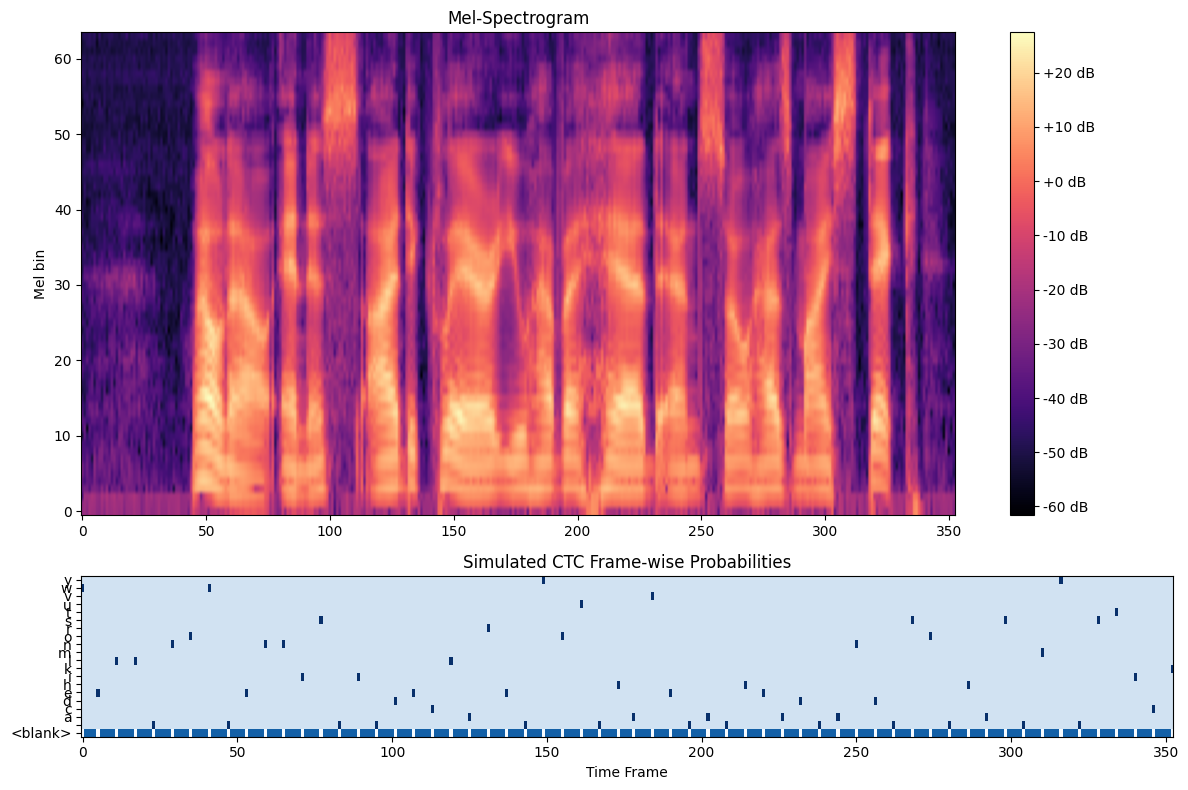

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torchaudio
import torch
import torch.nn.functional as F

# 1. LibriSpeech test-clean에서 긴 문장 하나 로드
dataset = torchaudio.datasets.LIBRISPEECH(root="./", url="test-clean", download=True)
waveform, sample_rate, transcript, *_ = dataset[10]
sentence = transcript.lower().strip()

# 2. Mel-Spectrogram 계산
mel_tf = torchaudio.transforms.MelSpectrogram(
    sample_rate=sample_rate, n_mels=64)
mel = mel_tf(waveform).squeeze(0).transpose(0,1)  # [T, F]
mel_db = torchaudio.functional.amplitude_to_DB(
    mel, multiplier=10.0, amin=1e-10, db_multiplier=0.0)

# 3. CTC 클래스 정의
chars = sorted(set(sentence))
classes = ["<blank>"] + chars
T = mel_db.shape[0]

# 4. 프레임별 확률 시뮬레이션
probs = np.full((T, len(classes)), 0.02, dtype=np.float32)
positions = np.linspace(0, T-1, len(sentence), dtype=int)
for pos, ch in zip(positions, sentence):
    idx = classes.index(ch)
    probs[pos, idx] = 0.8
probs[:,0] = 1.0 - probs[:,1:].sum(axis=1)

# 5. Greedy CTC 디코딩
best = np.argmax(probs, axis=1)
decoded = []
prev = None
for idx in best:
    if idx != 0 and idx != prev:
        decoded.append(classes[idx])
    prev = idx
decoded_sentence = "".join(decoded)

# 6. 텍스트 출력
print("REFERENCE:", sentence)
print("PREDICTED:", decoded_sentence)

# 7. 시각화
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8),
                               gridspec_kw={"height_ratios":[3,1]})

# (a) Mel-Spectrogram
im = ax1.imshow(mel_db.T, origin="lower", aspect="auto", cmap="magma")
ax1.set_title("Mel-Spectrogram")
ax1.set_ylabel("Mel bin")
fig.colorbar(im, ax=ax1, format="%+2.0f dB")

# (b) 확률 히트맵
ax2.imshow(probs.T, origin="lower", aspect="auto", cmap="Blues")
ax2.set_yticks(np.arange(len(classes)))
ax2.set_yticklabels(classes)
ax2.set_xlabel("Time Frame")
ax2.set_title("Simulated CTC Frame-wise Probabilities")

plt.tight_layout()
plt.show()

FULL Transformer

Epoch 01 | Avg Loss: 0.3292


Epoch 02 | Avg Loss: 0.2518


Epoch 03 | Avg Loss: 0.2504


Epoch 04 | Avg Loss: 0.2423


Epoch 05 | Avg Loss: 0.2431
Reference : well now ennis i declare you have a head and so has my stick
Prediction:                                                                                                                                                                                                         


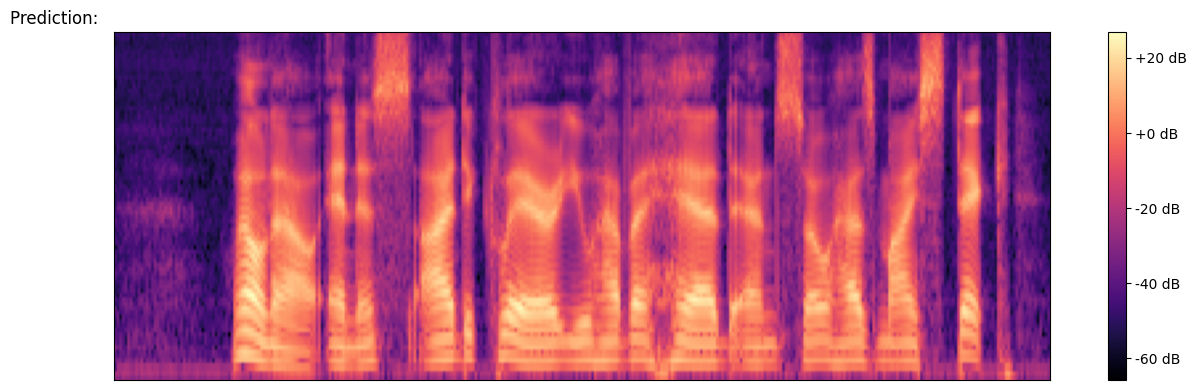

In [8]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
from torchaudio.datasets import LIBRISPEECH
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# ───────── CONFIG ─────────
DEVICE      = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SAMPLE_RATE = 16000
N_MELS      = 80
MAX_FRAMES  = 600
BATCH_SIZE  = 8
EPOCHS      = 5
LR          = 3e-4

# ───────── DATA & VOCAB ─────────
dataset = LIBRISPEECH(root="./", url="test-clean", download=True)
subset = [dataset[i] for i in range(500)]
transcripts = [t.lower().strip() for _, _, t, *_ in subset]
chars = sorted({c for utt in transcripts for c in utt})
vocab = {"<pad>":0, "<sos>":1, "<eos>":2, **{c:i+3 for i,c in enumerate(chars)}}
inv_vocab = {i:c for c,i in vocab.items()}
VOCAB_SIZE = len(vocab)

# ───────── FEATURE & DATASET ─────────
mel_transform = torchaudio.transforms.MelSpectrogram(
    sample_rate=SAMPLE_RATE, n_mels=N_MELS)

class LibriSpeechASR(Dataset):
    def __init__(self, examples): self.examples = examples
    def __len__(self): return len(self.examples)
    def __getitem__(self, idx):
        wav, sr, transcript, *_ = self.examples[idx]
        # resample if needed
        if sr != SAMPLE_RATE:
            wav = torchaudio.functional.resample(wav, sr, SAMPLE_RATE)
        # mel-spectrogram
        mel = mel_transform(wav).squeeze(0).transpose(0,1)
        mel = mel[:MAX_FRAMES]
        if mel.size(0) < MAX_FRAMES:
            pad = MAX_FRAMES - mel.size(0)
            mel = F.pad(mel, (0,0,0,pad))
        # CMVN
        mel = (mel - mel.mean()) / (mel.std() + 1e-5)
        # tokenize
        tokens = [vocab["<sos>"]] + \
                 [vocab.get(c, vocab["<pad>"]) for c in transcript] + \
                 [vocab["<eos>"]]
        return mel, torch.tensor(tokens, dtype=torch.long)

def collate_fn(batch):
    mels, tgts = zip(*batch)
    mels = torch.stack(mels).to(DEVICE)
    lengths = [t.size(0) for t in tgts]
    max_len = max(lengths)
    padded = torch.full((len(tgts), max_len),
                       vocab["<pad>"], dtype=torch.long)
    for i,t in enumerate(tgts):
        padded[i, :t.size(0)] = t
    return mels, padded.to(DEVICE)

train_ex, val_ex = train_test_split(subset, test_size=0.2, random_state=42)
train_loader = DataLoader(LibriSpeechASR(train_ex), batch_size=BATCH_SIZE,
                          shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(LibriSpeechASR(val_ex),   batch_size=BATCH_SIZE,
                          shuffle=False, collate_fn=collate_fn)

# ───────── MODEL ─────────
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=1000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len).unsqueeze(1)
        div = torch.exp(torch.arange(0, d_model, 2) *
                        -(math.log(10000.0) / d_model))
        pe[:,0::2] = torch.sin(pos * div)
        pe[:,1::2] = torch.cos(pos * div)
        self.pe = pe.unsqueeze(0)
    def forward(self, x):
        return x + self.pe[:,:x.size(1)].to(x.device)

class TransformerASR(nn.Module):
    def __init__(self, vocab_size, d_model=256, nhead=4,
                 num_enc=4, num_dec=4, dim_ff=512, dropout=0.1):
        super().__init__()
        self.enc_in     = nn.Linear(N_MELS, d_model)
        self.pos_enc    = PositionalEncoding(d_model, MAX_FRAMES)
        self.tgt_embed  = nn.Embedding(vocab_size, d_model)
        self.transformer = nn.Transformer(d_model, nhead,
                                          num_enc, num_dec,
                                          dim_ff, dropout,
                                          batch_first=True)
        self.out        = nn.Linear(d_model, vocab_size)

    def forward(self, src, tgt):
        B, T_src, _ = src.size()
        T_tgt = tgt.size(1)
        # encode
        src = self.enc_in(src)
        src = self.pos_enc(src)
        # embed target
        tgt = self.tgt_embed(tgt)
        tgt = self.pos_enc(tgt)
        # causal mask for decoder
        tgt_mask = nn.Transformer.generate_square_subsequent_mask(
            T_tgt).to(DEVICE)
        out = self.transformer(src, tgt, tgt_mask=tgt_mask)
        return self.out(out)

model     = TransformerASR(VOCAB_SIZE).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss(ignore_index=vocab["<pad>"])

# ───────── TRAIN with Progress Bar ─────────
for epoch in range(1, EPOCHS+1):
    model.train()
    total_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS}", leave=False)
    for src, tgt in loop:
        inp, outp = tgt[:, :-1], tgt[:, 1:]
        logits = model(src, inp)  # [B, T_tgt, VOCAB]
        loss = criterion(
            logits.reshape(-1, VOCAB_SIZE),
            outp.reshape(-1)
        )
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        loop.set_postfix(loss=loss.item())
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch:02d} | Avg Loss: {avg_loss:.4f}")

# ───────── INFERENCE ─────────
wav, sr, ref, *_ = dataset[10]
if sr != SAMPLE_RATE:
    wav = torchaudio.functional.resample(wav, sr, SAMPLE_RATE)
mel = mel_transform(wav).squeeze(0).transpose(0,1)
mel = mel[:MAX_FRAMES]
if mel.size(0) < MAX_FRAMES:
    mel = F.pad(mel, (0,0,0, MAX_FRAMES-mel.size(0)))
mel = (mel - mel.mean())/(mel.std()+1e-5)
src = mel.unsqueeze(0).to(DEVICE)

model.eval()
with torch.no_grad():
    seq = [vocab["<sos>"]]
    for _ in range(200):
        tgt = torch.tensor(seq, device=DEVICE).unsqueeze(0)
        logits = model(src, tgt)
        nxt = logits[0, -1].argmax().item()
        if nxt == vocab["<eos>"]:
            break
        seq.append(nxt)
    hyp = "".join(inv_vocab[i] for i in seq if i > 2)

print("Reference :", ref.lower())
print("Prediction:", hyp)

# play audio
display(Audio(wav.squeeze().cpu().numpy(), rate=SAMPLE_RATE))

# plot mel + text
db = torchaudio.functional.amplitude_to_DB(
    mel_transform(wav).squeeze(0), 10, 1e-10, 0
).cpu().numpy()
plt.figure(figsize=(12,4))
plt.imshow(db, origin='lower', aspect='auto', cmap='magma')
plt.title(f"Prediction: {hyp}")
plt.colorbar(format="%+2.0f dB")
plt.xticks([]); plt.yticks([])
plt.tight_layout()
plt.show()


# Pipeline
# [Raw WAV]
#    └─▶ MelSpectrogram → normalize → pad → src:[B,T_src,80]
#    └─▶ Text → tokenize+<sos>/<eos> → pad → tgt:[B,T_tgt]

# [Model]
#    src ─▶ Linear+PosEnc ─▶ TransformerEncoder ─┐
#                                               ├─▶ TransformerDecoder ─▶ Linear ─▶ logits
#    tgt ─▶ Embedding+PosEnc ─▶ Causal-mask ─────┘

# [Train]
#    logits, outp → CE Loss → backward → AdamW.step

# [Infer]
#    <sos> → Decoder 반복 호출 → argmax → decoded_text
#    ▶ play WAV, draw Mel+텍스트